In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
from scipy.stats import norm

,sim0,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9
0,0,0,0,0,0,0,0,0,0,0
1,-100,-100,-100,100,-100,-100,-100,100,-100,-100
2,-200,0,-200,0,0,-200,-200,200,-200,-200
3,-300,-100,-300,-100,-100,-300,-300,300,-300,-300
4,-200,-200,-400,0,-200,-200,-400,200,-400,-200
...,...,...,...,...,...,...,...,...,...,...
96,2000,-800,-200,-200,-1000,2600,-800,400,-1000,-1000
97,2100,-700,-300,-100,-1100,2500,-900,300,-1100,-1100
98,2200,-800,-200,-200,-1000,2400,-1000,200,-1200,-1000
99,2100,-700,-100,-100,-900,2300,-900,100,-1300,-1100


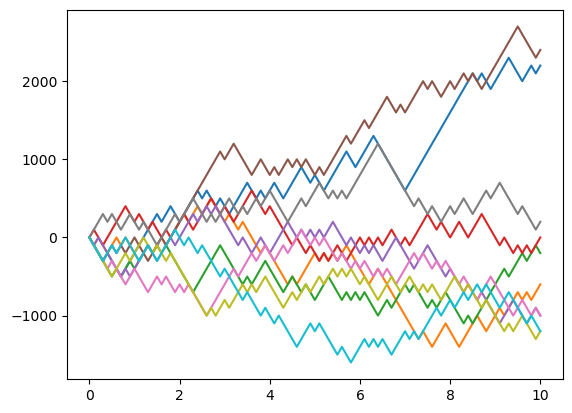

In [2]:
# create random walk
def random_walk(bet,start,end,step):
    simulations = [0]
    timeline = [start-step]
    
    for i in np.arange(start,end,step):
        one_simulation = np.random.choice([-1,1])*bet
        one_simulation += simulations[-1]
        simulations.append(one_simulation)
        timeline.append(i)
    return timeline,simulations

def run_random_walk(num_of_sim,bet,start,end,step):
    random_walk_df = pd.DataFrame()
    for i in range(num_of_sim):
        timeline,simulations = random_walk(bet,start,end,step)
        sns.lineplot(x=timeline,y=simulations)
        random_walk_df['sim%d'%i] = simulations
    return random_walk_df

random_walk_df = run_random_walk(10, 100,0.1,10.1,0.1)
random_walk_df

,sim0,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.376435,-0.494735,0.240043,0.773561,-0.106331,-0.352387,-0.093463,0.162065,0.039236,-0.290635
2,0.038629,-0.368177,-0.231202,0.919931,-0.368340,-0.793562,-0.142283,0.634648,0.336141,-0.733517
3,-0.548898,-0.257494,0.349853,0.780463,-0.231424,-0.741756,-0.888108,0.929140,0.462969,-0.708220
4,-0.652580,0.170964,0.415310,0.088527,-0.403932,-0.802342,-1.549500,1.083895,1.073508,-1.105108
...,...,...,...,...,...,...,...,...,...,...
96,-0.414827,-3.000222,0.868004,2.253783,-0.261185,7.892160,1.416490,2.150686,-3.135007,-3.648615
97,-0.650930,-3.125012,0.776619,1.594246,-0.213883,7.663160,1.470793,2.429036,-3.636633,-3.428526
98,-0.076258,-3.280105,0.806662,1.545970,-0.173284,7.040405,2.119959,2.429010,-3.495293,-3.370460
99,0.433954,-3.227498,0.830331,1.693020,-0.456682,7.214972,1.892572,2.285447,-3.682078,-3.603051


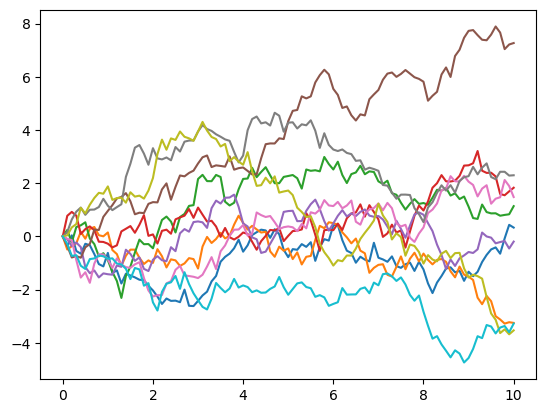

In [3]:
# create brownian motion
def brownian_motion(bet,start,end,step):
    simulations = [0]
    timeline = [start-step]
    
    for i in np.arange(start,end,step):
        one_simulation = np.random.normal(loc=0, scale=np.sqrt(step))
        one_simulation += simulations[-1]
        simulations.append(one_simulation)
        timeline.append(i)
    return timeline,simulations

def run_brownian_motion(num_of_sim,bet,start,end,step):
    brownian_motion_df = pd.DataFrame()
    for i in range(num_of_sim):
        timeline,simulations = brownian_motion(bet,start,end,step)
        sns.lineplot(x=timeline,y=simulations)
        brownian_motion_df['sim%d'%i] = simulations
    return brownian_motion_df

brownian_motion_df = run_brownian_motion(10,100,0.1,10.1,0.1)
brownian_motion_df

In [4]:
def monte_carlo_sim(S0, m, sigma, T, num_of_sim):
    simulations = np.arange(1,num_of_sim+1).tolist()
    Z = [norm.ppf(random.random()) for i in range(num_of_sim)]
    Simulated_Log_Return = m * T + sigma * np.sqrt(T) * np.array(Z)
    Simulated_return = np.exp(Simulated_Log_Return)-1
    Simulated_stock_Price = S0*(1+Simulated_return)
    monte_carlo_df = pd.DataFrame({
        'Simulation #':simulations,
        'Simulated_Log_Return':Simulated_Log_Return,
        'Simulated_return' : Simulated_return,
        'Simulated_stock_Price': Simulated_stock_Price
    }).set_index('Simulation #')
    monte_carlo_df[['Simulated_Log_Return', 'Simulated_return']] = monte_carlo_df[
        ['Simulated_Log_Return', 'Simulated_return']].applymap(lambda x: '{:.4f}'.format(x)).apply(pd.to_numeric, errors='coerce')
    return monte_carlo_df

monte_carlo_df = monte_carlo_sim(100, 0.05, 0.20, 1, 1000)
monte_carlo_df

,Simulated_Log_Return,Simulated_return,Simulated_stock_Price
Simulation #,,,
1,0.2543,0.2896,128.960293
2,-0.2220,-0.1991,80.089875
3,0.2328,0.2621,126.213577
4,0.0488,0.0500,104.996524
5,0.0880,0.0920,109.201488
...,...,...,...
996,0.0726,0.0753,107.534696
997,0.0412,0.0421,104.209978
998,0.5600,0.7506,175.059618


In [5]:
monte_carlo_df = monte_carlo_sim(100, 0.07, 0.16, 1, 1000)
monte_carlo_df

,Simulated_Log_Return,Simulated_return,Simulated_stock_Price
Simulation #,,,
1,0.3940,0.4828,148.283584
2,-0.1578,-0.1459,85.405620
3,0.0658,0.0680,106.799544
4,0.0232,0.0235,102.351778
5,0.1042,0.1098,110.982808
...,...,...,...
996,0.2314,0.2604,126.035918
997,-0.0652,-0.0631,93.690945
998,-0.1065,-0.1010,89.897797


In [6]:
expected_return = monte_carlo_df['Simulated_return'].mean()*100
print('Expected return for 1000 simulations is %.2f%%'%expected_return)

Expected return for 1000 simulations is 8.59%


In [7]:
naive_expected_return = expected_return*(1-0.4)
print('Naive expected return for 1000 simulations is %.2f%%'%naive_expected_return)

Naive expected return for 1000 simulations is 5.15%


In [8]:
monte_carlo_df_with_tax = monte_carlo_df.copy()

monte_carlo_df_with_tax['Simulated_return'] = monte_carlo_df_with_tax['Simulated_return'].apply(lambda x: x*(1-0.4) if x>0 else x)
expected_return_true = monte_carlo_df_with_tax['Simulated_return'].mean()*100
print('Expected return after tax for 1000 simulations is %.2f%%'%expected_return_true)

Expected return after tax for 1000 simulations is 3.81%
